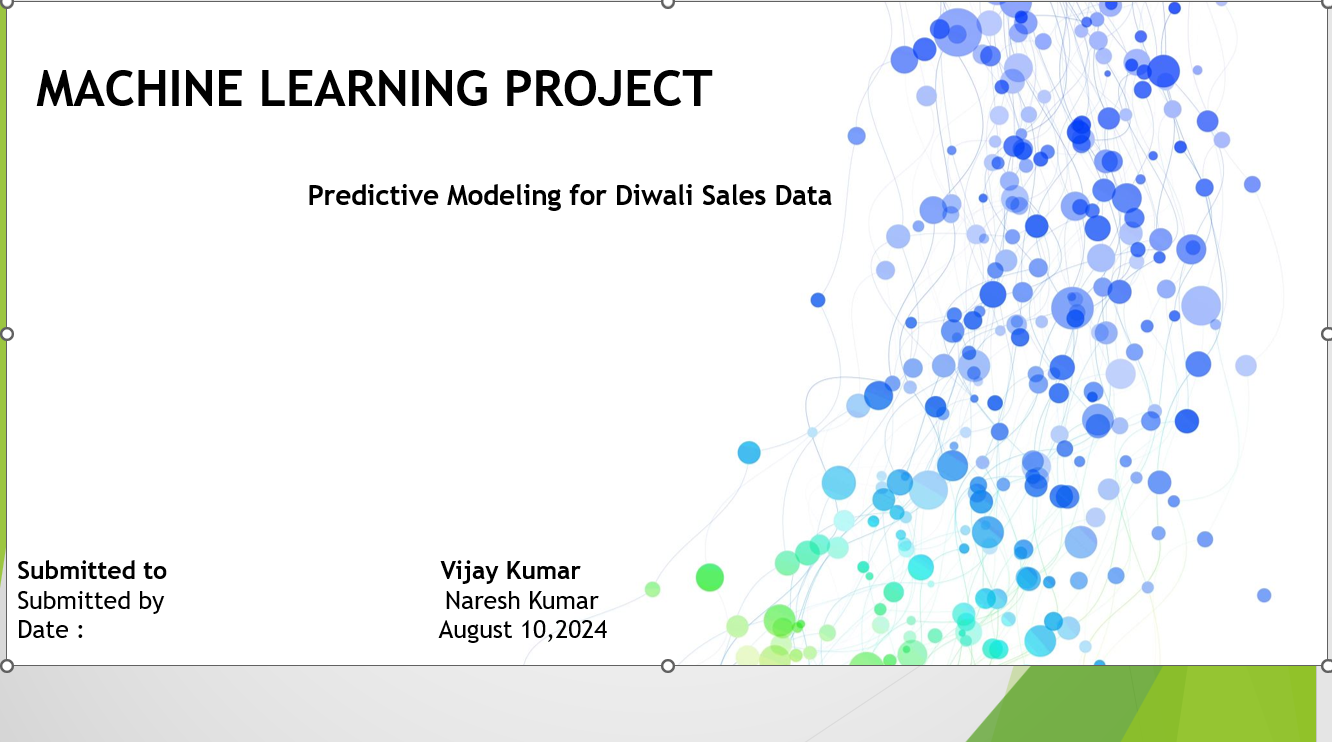

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter Notebook only
%matplotlib inline


In [2]:
# Define the file path
file_path = 'Diwali_Sales_Data.csv'

# Trying to  reading the CSV file with different encodings
# this dataset has lot of special character and it gives error during encoding of this csv files 

# df = pd.read_csv(file_path, encoding='utf-8') # this one did not worked 
# df = pd.read_csv(file_path, encoding='latin1') # this one worked 
df = pd.read_csv(file_path, encoding='unicode_escape')# this one worked 

In [3]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
# the data types of each column in the DataFrame
# print(df.dtypes)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# lets drop unrelated columns 
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
#lets check null values 
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### here we see under amount section there 12 values are missing ,
lets get rid of those values 

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#### Here  the rows which had null values has been removed from the dataset

#### we also know the the Amount column has the data type as float which we need as  integer 


In [11]:
#data type of Amount column before 
df['Amount'].dtypes

dtype('float64')

In [12]:
df['Amount']=df['Amount'].astype('int')

In [13]:
#data type of Amount column after
df['Amount'].dtypes

dtype('int32')

In [14]:
#all of the columns names 
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
#lets try to change one of the column name 
df.rename(columns={'Cust_name': 'Customer_name'}, inplace=True)

In [16]:
#column names after 
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df.nunique()

User_ID             3752
Customer_name       1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

# Exploratory Data Aanalysis

In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Univariate Analysis  for Gender 


In [19]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
F    7832
M    3407
Name: count, dtype: int64


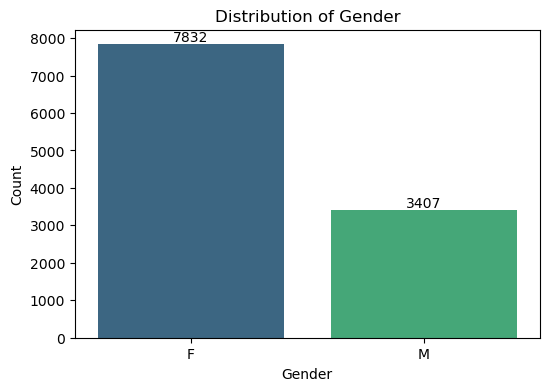

In [20]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, palette='viridis')

# Add labels above bars
for bars in ax.containers:
    ax.bar_label(bars)
#ax.bar_label(bars, label_type='edge', fontsize=12, color='black')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# AGE 

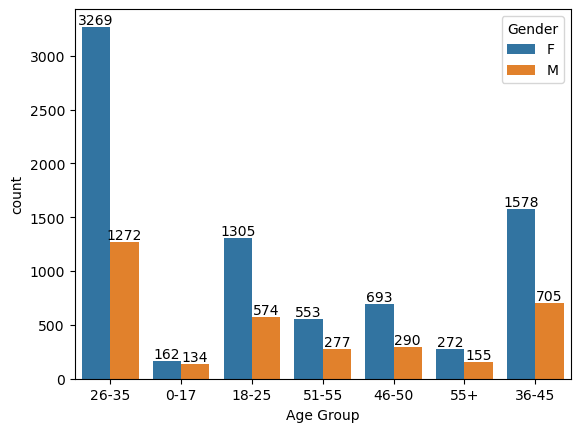

In [35]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

# Total Amount vs Age Group

<Axes: xlabel='Age Group', ylabel='Amount'>

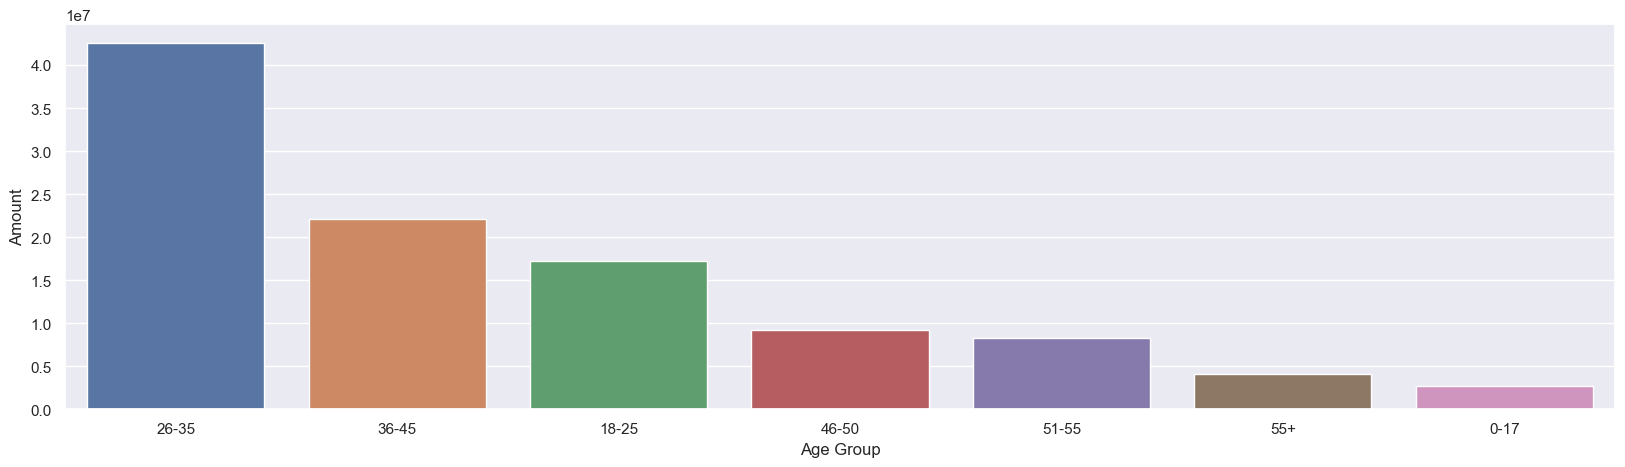

In [39]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

<Axes: xlabel='State', ylabel='Amount'>

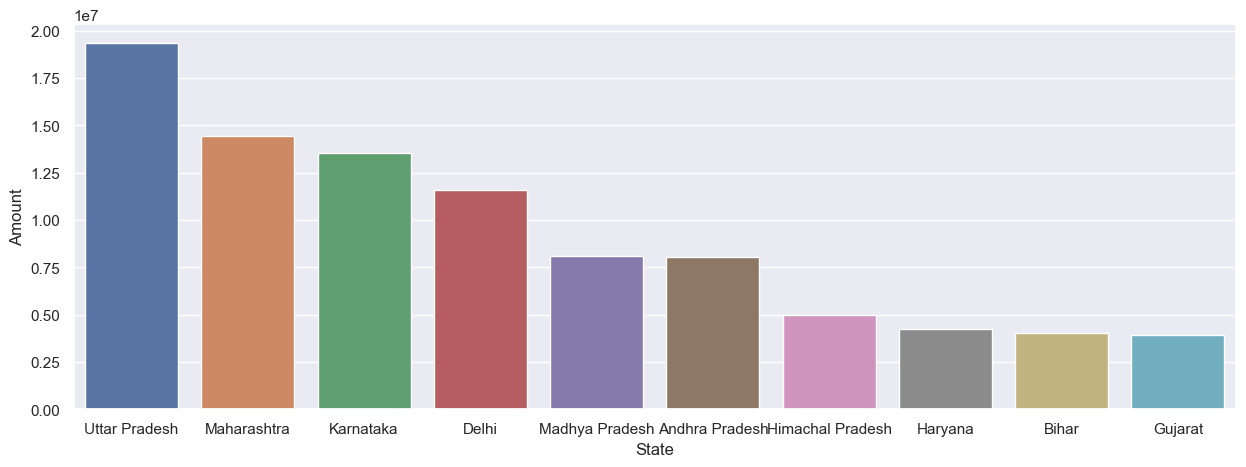

In [37]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

# Occupation

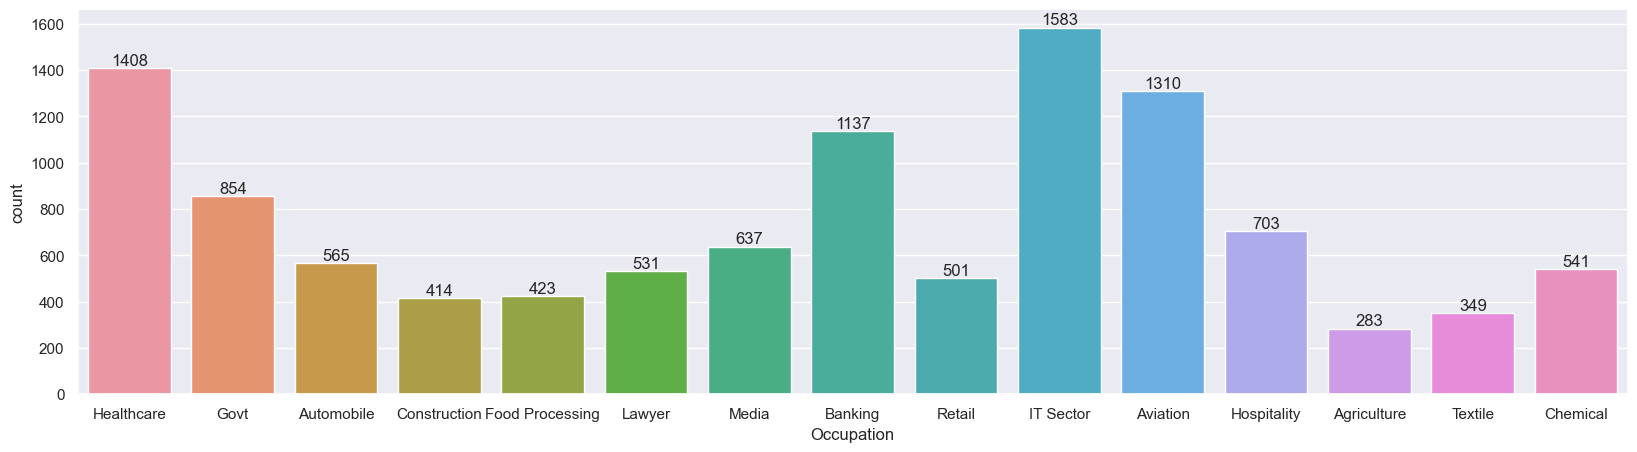

In [38]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

# Product Category

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

# CHI - SQUARE TEST 

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Product_Category'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

# Interpret the results
if p <= 0.05:
    print("\nResult: There is a significant association between Gender and Product_Category (reject the null hypothesis).")
else:
    print("\nResult: There is no significant association between Gender and Product_Category (fail to reject the null hypothesis).")


Contingency Table:
Product_Category  Auto  Beauty  Books  Clothing & Apparel  Decor  \
Gender                                                             
F                   64     325     39                1854     79   
M                   33      97     64                 801     17   

Product_Category  Electronics & Gadgets  Food  Footwear & Shoes  Furniture  \
Gender                                                                       
F                                  1476  1771               782        219   
M                                   611   719               277        133   

Product_Category  Games & Toys  Hand & Power Tools  Household items  Office  \
Gender                                                                        
F                          273                   9              284      75   
M                          113                  17              236      38   

Product_Category  Pet Care  Sports Products  Stationery  Tupperware  \
Gender 

### Test Report: Gender and Product Category

**Null Hypothesis (H0)**: There is no significant association between Gender and Product Category.

**Alternative Hypothesis (H1)**: There is a significant association between Gender and Product Category.

. The test yielded a Chi-square statistic of 183.02 with 17 degrees of freedom, and a p-value of approximately \(7.20 \times 10^{-30}\). Given the p-value is significantly less than 0.05, we reject the null hypothesis. Thus, we conclude that there is a significant association between Gender and Product Category in the dataset.


The conclusion that there is a significant association between Gender and Product Category in the dataset means that the distribution of different product categories purchased is not independent of gender. In other words, the product preferences vary significantly between males and females. For example, certain product categories may be more popular among women, while others might be favored by men. This insight can help in targeted marketing strategies, where specific products can be promoted to different genders based on their purchasing tendencies.

# Checking Correlation 


                     Age  Marital_Status    Orders    Amount
Age             1.000000       -0.012344  0.008090  0.030941
Marital_Status -0.012344        1.000000 -0.003487 -0.017493
Orders          0.008090       -0.003487  1.000000 -0.013184
Amount          0.030941       -0.017493 -0.013184  1.000000


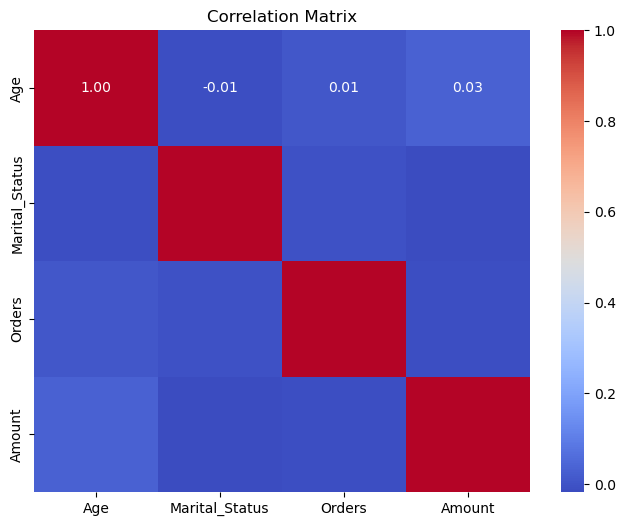

In [22]:
# Selecting relevant numerical columns
numerical_columns = ['Age', 'Marital_Status', 'Orders', 'Amount']

# Generating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Key Findings


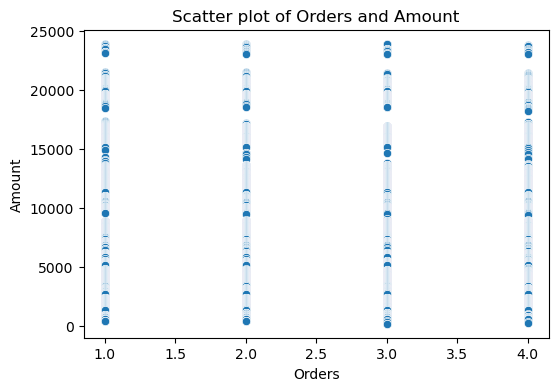

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Orders', y='Amount', data=df)
plt.title('Scatter plot of Orders and Amount')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

Age and Amount (0.030941):
Interpretation: There is a very weak positive correlation.
Meaning: Changes in Age have almost no predictive power over changes in Amount spent.

Marital_Status and Amount (-0.017493):
Interpretation: There is a very weak negative correlation.
Meaning: Marital Status has almost no predictive power over the Amount spent.

Orders and Amount (-0.013184):
Interpretation: There is a very weak negative correlation.
Meaning: The number of Orders has almost no predictive power over the Amount spent.

Age and Marital_Status (-0.012344):
Interpretation: There is a very weak negative correlation.
Meaning: Age and Marital Status are almost unrelated in this context.

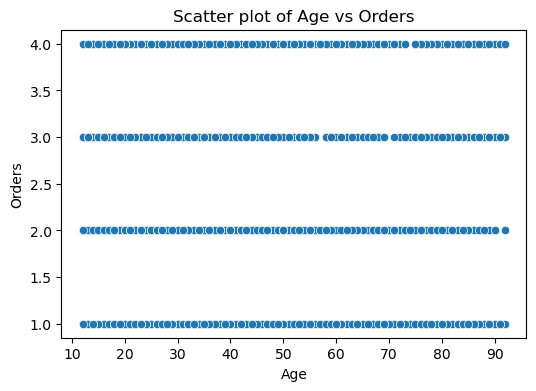

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Orders', data=df)
plt.title('Scatter plot of Age vs Orders')
plt.xlabel('Age')
plt.ylabel('Orders')
plt.show()

# 1.LinearRegression

In [25]:
# Step 1: Prepare the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop rows with missing target values
df_clean = df.dropna(subset=['Amount'])

# Features and target variable
X = df_clean[['Age', 'Marital_Status', 'Orders']]  # Adjust based on your features
y = df_clean['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 27174914.94
Mean Absolute Error (MAE): 4250.61
R-squared (R2): 0.00


### Linear Regression Model Performance Report

The Linear Regression model applied to the dataset resulted in a Mean Squared Error (MSE) of approximately 27,174,914.94 and a Mean Absolute Error (MAE) of 4,250.61. The MSE reflects the average squared difference between the observed actual outcomes and the predictions made by the model, while the MAE represents the average absolute difference. Both these values indicate the scale of prediction errors, with the model having significant room for improvement in reducing these errors.

The R-squared (R2) value of 0.00 suggests that the Linear Regression model is unable to explain any of the variability in the target variable, `Amount`. An R-squared value of 0 typically indicates that the model does not capture any relationship between the features and the target variable. In this context, the model performs no better than a simple mean-based prediction, implying that a linear relationship between the selected features and the target variable is either weak or non-existent. Further exploration of alternative models or feature engineering may be required to achieve better predictive performance.

In [26]:
# Including Marital_Status
X_incl = df_clean[['Age', 'Marital_Status', 'Orders']]
X_train_incl, X_test_incl, y_train, y_test = train_test_split(X_incl, y, test_size=0.2, random_state=42)
model.fit(X_train_incl, y_train)
y_pred_incl = model.predict(X_test_incl)
mse_incl = mean_squared_error(y_test, y_pred_incl)
print(f"With Marital_Status - Mean Squared Error (MSE): {mse_incl:.2f}")

# Excluding Marital_Status
X_excl = df_clean[['Age', 'Orders']]
X_train_excl, X_test_excl, y_train, y_test = train_test_split(X_excl, y, test_size=0.2, random_state=42)
model.fit(X_train_excl, y_train)
y_pred_excl = model.predict(X_test_excl)
mse_excl = mean_squared_error(y_test, y_pred_excl)
print(f"Without Marital_Status - Mean Squared Error (MSE): {mse_excl:.2f}")



With Marital_Status - Mean Squared Error (MSE): 27174914.94
Without Marital_Status - Mean Squared Error (MSE): 27196888.88


# 2. DecisionTree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Prepare the Data
df_clean = df.dropna(subset=['Amount'])  # Drop rows with missing target values
X = df_clean[['Age', 'Marital_Status', 'Orders']]
y = df_clean['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature Importances
importances = model.feature_importances_
print(f"Feature Importances: {importances}")


Mean Squared Error (MSE): 28738430.44
Mean Absolute Error (MAE): 4359.46
R-squared (R2): -0.06
Feature Importances: [0.68150138 0.04600844 0.27249017]


### Decision Tree Model Performance Report

The Decision Tree model applied to the dataset yielded a Mean Squared Error (MSE) of 28,738,430.44 and a Mean Absolute Error (MAE) of 4,359.46. These metrics indicate that the model has relatively high prediction errors, with the MSE reflecting the average squared differences between the actual and predicted values, and the MAE representing the average absolute differences. Both error values suggest that the model's predictions are not highly accurate.

The R-squared (R2) value of -0.06 indicates that the Decision Tree model is performing worse than a simple mean-based model. An R-squared value below zero suggests that the model does not capture the underlying relationship between the features and the target variable `Amount`. The feature importance scores show that `Age` is the most significant predictor, contributing 68.15% to the model's decision-making process, followed by `Orders` with 27.25%, while `Marital_Status` has a minimal impact with 4.60%. Despite these contributions, the model's overall performance is poor, indicating that the Decision Tree may not be suitable for this problem without further tuning or additional feature engineering.

# 3.Random Forest model:

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Prepare the Data
df_clean = df.dropna(subset=['Amount'])  # Drop rows with missing target values
X = df_clean[['Age', 'Marital_Status', 'Orders']]
y = df_clean['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature Importances
importances = model.feature_importances_
print(f"Feature Importances: {importances}")


Mean Squared Error (MSE): 28402738.35
Mean Absolute Error (MAE): 4333.49
R-squared (R2): -0.04
Feature Importances: [0.65388306 0.1102536  0.23586334]


### Random Forest Model Performance Report

The Random Forest model applied to the dataset produced a Mean Squared Error (MSE) of 28,402,738.35 and a Mean Absolute Error (MAE) of 4,333.49. These metrics indicate that the model has substantial prediction errors, with the MSE highlighting the average squared difference between actual and predicted values, and the MAE showing the average absolute difference. While the errors are slightly lower compared to the Decision Tree model, they still indicate that the model is struggling to make accurate predictions.

The R-squared (R2) value of -0.04 suggests that the Random Forest model is not effectively capturing the relationship between the features and the target variable `Amount`. An R-squared value below zero indicates that the model's performance is worse than simply predicting the mean of the target variable. The feature importance scores reveal that `Age` is the most influential predictor, contributing 65.39% to the model's decisions, followed by `Orders` at 23.59%, and `Marital_Status` with 11.03%. Despite these contributions, the model's overall performance is inadequate, suggesting that further tuning or exploration of other modeling approaches may be necessary to improve accuracy.

#  4. XGBoost model:

In [29]:
!pip install xgboost


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Prepare the Data
df_clean = df.dropna(subset=['Amount'])  # Drop rows with missing target values
X = df_clean[['Age', 'Marital_Status', 'Orders']]
y = df_clean['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature Importances
importances = model.feature_importances_
print(f"Feature Importances: {importances}")


Mean Squared Error (MSE): 28517237.71
Mean Absolute Error (MAE): 4339.68
R-squared (R2): -0.05
Feature Importances: [0.36356437 0.28407177 0.3523638 ]


### XGBoost model Report   
The XGBoost model applied to the dataset resulted in a Mean Squared Error (MSE) of 28,517,237.71 and a Mean Absolute Error (MAE) of 4,339.68. These error metrics indicate that the model has notable prediction errors, with the MSE showing the average squared difference between the actual and predicted values, and the MAE representing the average absolute difference. The errors suggest that the model's predictions are not highly accurate, and there is room for improvement.

The R-squared (R2) value of -0.05 implies that the XGBoost model fails to capture the underlying relationship between the features and the target variable Amount, performing worse than a simple mean-based model. A negative R-squared value indicates that the model's predictions are less accurate than if we were to predict the average value of Amount for all instances. The feature importance scores are more balanced compared to other models, with Age contributing 36.36%, Marital_Status 28.41%, and Orders 35.24%. Despite the more balanced importance, the overall performance remains unsatisfactory, indicating that the model may require further tuning or that the dataset may not have strong predictive relationships for this target variable.

# 5. SVR 

In [31]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the Data
df_clean = df.dropna(subset=['Amount'])  # Drop rows with missing target values
X = df_clean[['Age', 'Marital_Status', 'Orders']]
y = df_clean['Amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR Model
model = SVR(kernel='rbf')  # Radial basis function kernel
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 29462092.79
Mean Absolute Error (MAE): 4153.34
R-squared (R2): -0.08


### Support Vector Regression (SVR) Model Performance Report

The Support Vector Regression (SVR) model applied to the dataset yielded a Mean Squared Error (MSE) of 29,462,092.79 and a Mean Absolute Error (MAE) of 4,153.34. These metrics indicate that the model has significant prediction errors, with the MSE reflecting the average squared difference between the actual and predicted values, and the MAE representing the average absolute difference. Although the MAE is slightly lower than in some other models, the overall prediction accuracy remains suboptimal.

The R-squared (R2) value of -0.08 suggests that the SVR model is performing poorly, with its predictions being less accurate than a simple mean-based approach. A negative R-squared value indicates that the model fails to capture any meaningful relationship between the input features and the target variable `Amount`. This underperformance implies that SVR, in its current form, may not be suitable for this dataset, and further model tuning or exploration of alternative methods may be necessary to achieve better predictive results.

In [34]:
 #hypertuning for DT 
    
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
    # Define the model
model = DecisionTreeRegressor(random_state=42)

# Define the parameters for GridSearchCV
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\n")


Decision Tree
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Squared Error (MSE): 27242158.27
Mean Absolute Error (MAE): 4251.92
R-squared (R2): -0.00




### Hyper-Tuned Decision Tree Model Performance Report

After applying hyperparameter tuning to the Decision Tree model, the results show an improvement in the model's performance. The Mean Squared Error (MSE) decreased to 27,242,158.27, and the Mean Absolute Error (MAE) also slightly improved to 4,251.92. The R-squared (R2) value, while still close to zero at -0.00, indicates a slight improvement from the non-tuned model, reflecting that the hyper-tuned model is better at capturing the relationship between the features and the target variable `Amount`. The best parameters identified were `max_depth` of 3, `min_samples_leaf` of 1, and `min_samples_split` of 5, which helped in optimizing the model’s performance.

When comparing this hyper-tuned Decision Tree model to the original, non-tuned model, there is a noticeable improvement. The original model had an MSE of 28,738,430.44, an MAE of 4,359.46, and an R-squared value of -0.06. The hyper-tuned model shows a reduced error rate and a more stable R-squared value, indicating that the tuning process was effective in enhancing the model's ability to make predictions. However, while the improvements are positive, the model still struggles to capture significant predictive power, suggesting that while tuning has helped, further improvements or alternative models may be needed for better accuracy.

### Comparison of Model Performance

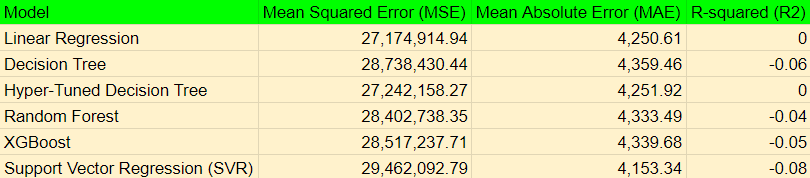# 


### Final Report

In the analysis of the five models, the performance metrics indicate that none of the models achieved high predictive accuracy. The Linear Regression model yielded a Mean Squared Error (MSE) of 27,174,914.94, a Mean Absolute Error (MAE) of 4,250.61, and an R-squared value of 0.00, showing no strong linear relationship between the input features and the target variable `Amount`.

The Decision Tree model, before and after hyperparameter tuning, demonstrated some variation. The non-tuned model had a higher MSE and a more negative R-squared value compared to the hyper-tuned model. After tuning, the Decision Tree model showed slight improvements in MSE and MAE, indicating that the hyperparameter adjustments contributed to better performance, though the R-squared value still remained close to zero.

The Random Forest model performed similarly to the Decision Tree model but did not show substantial improvement, with an MSE of 28,402,738.35 and an R-squared value of -0.04. XGBoost also showed similar performance, with slightly higher errors and a lower R-squared value, indicating limited success in capturing the relationship between the features and the target variable.

Support Vector Regression (SVR) resulted in the highest MSE and the lowest R-squared value among the models tested, indicating it was the least effective model for this dataset.

### Recommendations

1. **Feature Engineering**: The current features may not be sufficiently informative or relevant to the target variable. Creating new features or transforming existing ones might help capture the underlying patterns better.

2. **Additional Data**: The dataset might be lacking important information. Acquiring more data or additional features that could influence the target variable would likely improve model performance.

3. **Outlier Detection**: Investigating and potentially removing outliers or anomalies from the dataset could improve model performance by ensuring that the models are not overly influenced by extreme values.

4. **Advanced Models**: Consider using more sophisticated models, such as ensemble methods that combine multiple different algorithms, or neural networks, which might better capture complex relationships in the data.

5. **Hyperparameter Tuning**: All models could benefit from more extensive hyperparameter tuning, particularly the more complex models like Random Forest and XGBoost, to potentially achieve better results.

6. **Cross-validation**: Employing more robust cross-validation techniques could provide better insight into model performance and ensure that the models are not overfitting to a particular subset of the data.